In [69]:
%matplotlib inline
from loader import load_ECG
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [85]:
file = 'data/Data.txt'
freq_hertz = 100.0
# want time steps that are milliseconds
frequency_kHz = freq_hertz / 1000
data = load_ECG(file, frequency_kHz)

In [104]:
# find R peaks by taking a threshold and finding point where the derivitive passes 0 and find the max of them
# derivative change is captured by looking to see if current "value" is less than the prior value
thresh = np.percentile(data.signal, 97)

peaks = []
window = False
window_derivs = []
for i, v in enumerate(data.signal):
    if (window and v > thresh) and (v < data.signal[i-1]):
        window_derivs.append((data.time[i-1], data.signal[i-1]))
    elif (window and v <= thresh):
        if len(window_derivs) > 0:
            window_derivs.sort(key=lambda x: x[1])
            peaks.append(window_derivs.pop())
        window = False
        window_derivs = []
    elif (not window and v > thresh):
        window = True

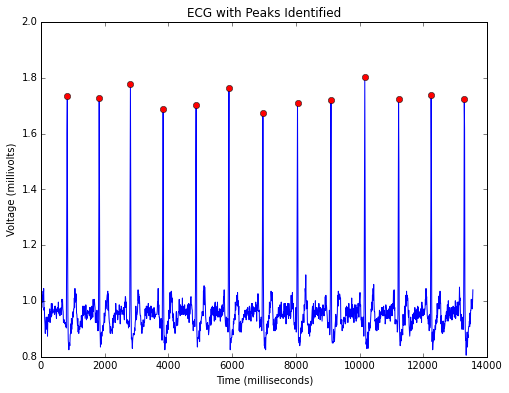

In [121]:
# show ECG with R peaks
peak_time = [i[0] for i in peaks]
peak_val = [i[1] for i in peaks]

fig, ax = plt.subplots()
ax.plot(data.time, data.signal)
ax.plot(peak_time, peak_val, 'ro')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Voltage (millivolts)')
plt.title('ECG with Peaks Identified')
plt.show()

In [118]:
# Calculate R-R peak intervals for all Rs provided in the dataset. Calculate the mean heart rate (BPM) and its standard deviation.
peak_intervals = [time - peak_time[i-1] for i, time in enumerate(peak_time) if i > 0]
heart_rate = [(60*1000)/interval for interval in peak_intervals]

print 'Mean Heart Rate (BPM):', np.mean(heart_rate)
print 'Stdev Heart Rate (BPM):', np.std(heart_rate)

Mean Heart Rate (BPM): 57.8757200538
Stdev Heart Rate (BPM): 1.61067717876


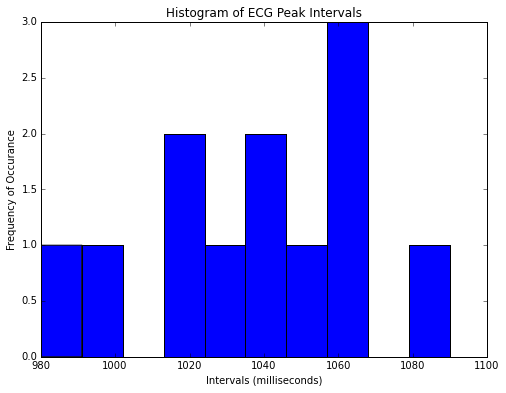

In [120]:
# Present the R-R peak intervals in a histogram. 
plt.hist(peak_intervals)
plt.xlabel('Intervals (milliseconds)')
plt.ylabel('Frequency of Occurance')
plt.title('Histogram of ECG Peak Intervals')
plt.show()

# Questions
* Mean BPM: 57.8757200538
* BPM STD: 1.61067717876
* Is the heart rate's std meaningful or should we always focus only on the BPM measure?: The heart rate's standard deviation is significant because it can provide a clear signal as to the consistency/rhythm at which the heart is pumping. In other words, it indicates the variability in the rate at which the heart is activating. Based on what we covered in class, we'd expect there to be a consistent rhythm in when beats are happening and therefore a relatively small standard deviation. In the case of arrhythmic patients, the std would be higher.